In [37]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [39]:
budata = pd.read_json('yelp_training_set\yelp_training_set_business.json',lines = True)
bdata = budata.copy()

del bdata['type']# since bdata['type'].nunique() == 1
del bdata['neighborhoods'] # since no useful data
#bdata.set_index('business_id', inplace = True)
bdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11537 entries, 0 to 11536
Data columns (total 11 columns):
business_id     11537 non-null object
categories      11537 non-null object
city            11537 non-null object
full_address    11537 non-null object
latitude        11537 non-null float64
longitude       11537 non-null float64
name            11537 non-null object
open            11537 non-null bool
review_count    11537 non-null int64
stars           11537 non-null float64
state           11537 non-null object
dtypes: bool(1), float64(3), int64(1), object(6)
memory usage: 912.7+ KB


In [40]:
# trying to mess with categories

cat = bdata.categories # this is a series

temp = set()
f = lambda x : temp.update(x)
cat.apply(f)
cat_counts = {el:0 for el in temp}

all_cat = []
k = lambda x: all_cat.extend(x)
cat.apply(k)

for e in all_cat:
    cat_counts[e] += 1

all_cat = list(temp) 

# all_cat is a list of all distinct categories
# cat_counts is a dict of category counts
 # do a pie chart

In [42]:
# doing some nonsense to unpack the categories to make the data frame more accesible

df_dict = {}
for category in all_cat:
    v_list = []
    for row in cat:
        if category in row:
            v_list.append(1)
        else:
            v_list.append(0)
    df_dict[category] = v_list

lol = pd.DataFrame(df_dict)   # lol has all 508 categories with 1/0 associated with each row of bdata
lol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11537 entries, 0 to 11536
Columns: 508 entries, Accessories to Zoos
dtypes: int64(508)
memory usage: 44.7 MB


In [43]:
con = [bdata, lol]

big = pd.concat(con, axis = 1)

del big['categories']
# big.head()

big.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11537 entries, 0 to 11536
Columns: 518 entries, business_id to Zoos
dtypes: bool(1), float64(3), int64(509), object(5)
memory usage: 45.5+ MB


In [44]:
just_cat = big.copy()

del just_cat['city']
del just_cat['latitude']
del just_cat['longitude']
del just_cat['state']
del just_cat['stars']
del just_cat['business_id']
del just_cat['review_count']
del just_cat['name']
del just_cat['full_address']

#just_cat.head()

just_cat_open = pd.DataFrame(just_cat[just_cat['open'] == True])
del just_cat_open['open']
just_cat_closed = pd.DataFrame(just_cat[just_cat['open'] == False])
del just_cat_closed['open']

#just_cat_open.head()

In [45]:
open_cat_counts = {}
closed_cat_counts = {}
for cat in all_cat:
    open_cat_counts[cat] = just_cat_open[cat].sum()
    closed_cat_counts[cat] = just_cat_closed[cat].sum()

o = pd.Series(open_cat_counts)
o.sort_values(ascending=False, inplace=True)

c = pd.Series(closed_cat_counts)
c.sort_values(ascending=False, inplace=True)

f = lambda x: (x/11537.0) * 100.0 

oP = o.apply(f)
cP = c.apply(f)


In [102]:
print oP

Restaurants                      32.044726
Shopping                         13.599723
Food                             12.204213
Beauty & Spas                     6.492156
Automotive                        4.767271
Mexican                           4.645922
Active Life                       4.264540
Nightlife                         4.186530
Health & Medical                  4.056514
Fashion                           3.917830
Event Planning & Services         3.735807
Home Services                     3.493109
American (Traditional)            3.467106
Pizza                             3.363093
Bars                              3.363093
Hotels & Travel                   3.207073
Fast Food                         3.198405
Sandwiches                        2.843027
Grocery                           2.773685
Local Services                    2.695675
Hotels                            2.409639
Arts & Entertainment              2.383635
American (New)                    2.244951
Coffee & Te

WHICH CATEGORIES ARE MOST USED
Restaurants                      32.0
Shopping                         13.6
Beauty & Spas                     6.5
Automotive                        4.8
Mexican                           4.6
Active Life                       4.3
Nightlife                         4.2
Health & Medical                  4.0

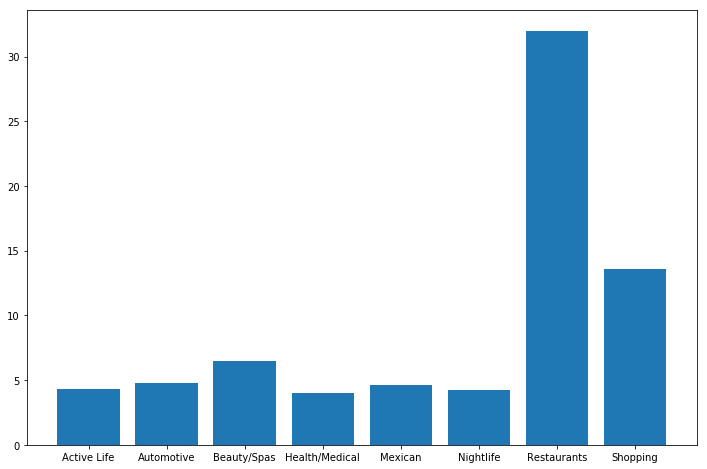

In [108]:
x =['Restaurants',                   
'Shopping'   ,                      
'Beauty/Spas'   ,                  
'Automotive' ,                       
'Mexican'   ,                    
'Active Life'  ,                 
'Nightlife' ,                       
'Health/Medical'  ]  

y = [32.0, 13.6, 6.5, 4.8, 4.6, 4.3, 4.2, 4.0]

plt.figure(figsize = (12,8))
plt.bar(x,y)
plt.show()

In [234]:
print cP

Restaurants                         6.986218
Food                                1.802895
Nightlife                           1.360839
Bars                                1.118142
Shopping                            0.970790
Mexican                             0.814770
American (New)                      0.710757
American (Traditional)              0.693421
Pizza                               0.598076
Coffee & Tea                        0.598076
Italian                             0.511398
Sandwiches                          0.468059
Ice Cream & Frozen Yogurt           0.398717
Chinese                             0.346711
Buffets                             0.338043
Active Life                         0.286036
Lounges                             0.268701
Burgers                             0.260033
Barbeque                            0.251365
Arts & Entertainment                0.251365
Books, Mags, Music & Video          0.251365
Fashion                             0.242697
Delis     

In [8]:
just_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1205 entries, 0 to 1204
Columns: 371 entries, open to Yoga
dtypes: bool(1), int64(370)
memory usage: 3.4 MB


In [46]:
# looking at stars and ratings

bd = big.copy()

del bd['city']
del bd['latitude']
del bd['longitude']
del bd['state']
del bd['full_address']
del bd['name']
del bd['business_id']



b = bd[bd['open'] == True]
c = bd[bd['open'] == False]

# b['stars'].nunique() = 9 ; 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5

list_rat = [1,1.5,2,2.5,3,3.5,4,4.5,5]
brat_counts = []
crat_counts = []

for rating in list_rat:
    brat_counts.append(b[b['stars'] == rating].shape[0]) # get the number of rows per rating
    
for rating in list_rat:
    crat_counts.append(c[c['stars'] == rating].shape[0]) # get the number of rows per rating

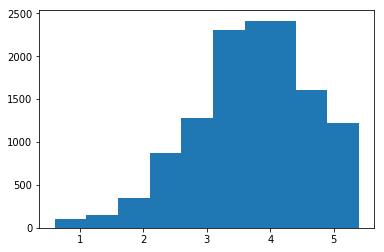

In [47]:
plt.figure()
plt.bar(list_rat,brat_counts)
plt.show()

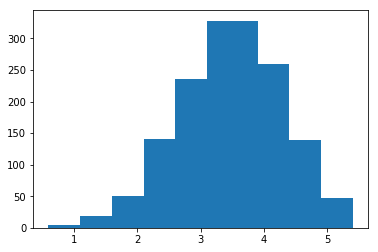

In [48]:
plt.figure()
plt.bar(list_rat,crat_counts)
plt.show()


In [49]:
x = bd[bd['review_count'] > 5]
xo = x[x['open'] == True]
xc = x[x['open'] == False]

list_rat = [1,1.5,2,2.5,3,3.5,4,4.5,5]
xorat_counts = []
xcrat_counts = []

for rating in list_rat:
    xorat_counts.append(xo[xo['stars'] == rating].shape[0]) # get the number of rows per rating
    
for rating in list_rat:
    xcrat_counts.append(xc[xc['stars'] == rating].shape[0]) # get the number of rows per rating

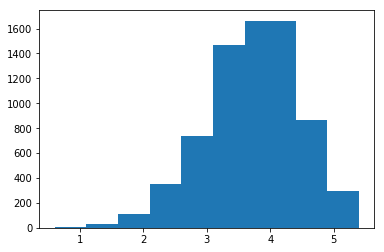

In [50]:
plt.figure()
plt.bar(list_rat,xorat_counts)
plt.show()

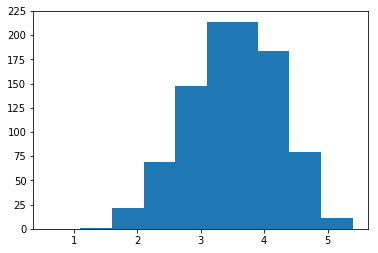

In [51]:
plt.figure()
plt.bar(list_rat,xcrat_counts)
plt.show()

In [111]:
k = big.sort_values('review_count', axis=0, ascending=False)
ka = k[k['open'] ==True]
top_quarter = ka.shape[0] //4

kq = ka.head(top_quarter)




kq.head()


,business_id,city,full_address,latitude,longitude,name,open,review_count,stars,state,...,Wholesale Stores,Wigs,Window Washing,Windows Installation,Windshield Installation & Repair,Wine Bars,Wineries,Women's Clothing,Yoga,Zoos
9533,hW0Ne_HTHEAgGF1rAdmR-g,Phoenix,"3400 E Sky Harbor Blvd\nPhoenix, AZ 85034",33.434750,-112.006440,Phoenix Sky Harbor International Airport,True,862,3.0,AZ,...,0,0,0,0,0,0,0,0,0,0
5498,VVeogjZya58oiTxK7qUjAQ,Phoenix,"623 E Adams St\nPhoenix, AZ 85004",33.449233,-112.065458,Pizzeria Bianco,True,803,4.0,AZ,...,0,0,0,0,0,0,0,0,0,0
3428,JokKtdXU7zXHcr20Lrk29A,Tempe,"1340 E 8th St\nSte 104\nTempe, AZ 85281",33.419451,-111.915926,Four Peaks Brewing Co,True,735,4.5,AZ,...,0,0,0,0,0,0,0,0,0,0
6422,ntN85eu27C04nwyPa8IHtw,Phoenix,"801 N 1st St\nPhoenix, AZ 85004",33.456696,-112.072327,Matt's Big Breakfast,True,689,4.0,AZ,...,0,0,0,0,0,0,0,0,0,0
8283,EWMwV5V9BxNs_U6nNVMeqw,Phoenix,"3815 N Central Ave\nPhoenix, AZ 85012",33.491645,-112.073196,FEZ,True,652,4.0,AZ,...,0,0,0,0,0,0,0,0,0,0


In [92]:
s_d= {}

for index, row in kq.iterrows():
    print row['review_count'] ,row['state']
    



862 AZ
803 AZ
735 AZ
689 AZ
652 AZ
594 AZ
580 AZ
575 AZ
549 AZ
525 AZ
502 AZ
489 AZ
477 AZ
461 AZ
461 AZ
453 AZ
450 AZ
444 AZ
441 AZ
434 AZ
431 AZ
421 AZ
412 AZ
402 AZ
398 AZ
390 AZ
363 AZ
362 AZ
358 AZ
357 AZ
353 AZ
349 AZ
347 AZ
343 AZ
335 AZ
333 AZ
326 AZ
323 AZ
321 AZ
318 AZ
317 AZ
316 AZ
315 AZ
310 AZ
309 AZ
307 AZ
305 AZ
304 AZ
303 AZ
299 AZ
298 AZ
293 AZ
292 AZ
291 AZ
290 AZ
287 AZ
283 AZ
281 AZ
278 AZ
276 AZ
272 AZ
271 AZ
271 AZ
270 AZ
269 AZ
269 AZ
269 AZ
268 AZ
265 AZ
264 AZ
264 AZ
263 AZ
263 AZ
262 AZ
262 AZ
259 AZ
258 AZ
258 AZ
255 AZ
248 AZ
246 AZ
245 AZ
243 AZ
239 AZ
238 AZ
238 AZ
236 AZ
236 AZ
235 AZ
235 AZ
233 AZ
230 AZ
229 AZ
229 AZ
228 AZ
227 AZ
227 AZ
224 AZ
222 AZ
222 AZ
221 AZ
221 AZ
220 AZ
219 AZ
218 AZ
217 AZ
216 AZ
214 AZ
213 AZ
212 AZ
210 AZ
207 AZ
206 AZ
203 AZ
203 AZ
202 AZ
202 AZ
202 AZ
201 AZ
200 AZ
199 AZ
199 AZ
199 AZ
198 AZ
197 AZ
197 AZ
197 AZ
197 AZ
196 AZ
196 AZ
194 AZ
193 AZ
193 AZ
193 AZ
192 AZ
192 AZ
192 AZ
189 AZ
189 AZ
189 AZ
188 AZ
187 AZ
187 AZ

30 AZ
30 AZ
30 AZ
30 AZ
30 AZ
30 AZ
30 AZ
30 AZ
29 AZ
29 AZ
29 AZ
29 AZ
29 AZ
29 AZ
29 AZ
29 AZ
29 AZ
29 AZ
29 AZ
29 AZ
29 AZ
29 AZ
29 AZ
29 AZ
29 AZ
29 AZ
29 AZ
29 AZ
29 AZ
29 AZ
29 AZ
29 AZ
29 AZ
29 AZ
29 AZ
29 AZ
29 AZ
29 AZ
29 AZ
29 AZ
29 AZ
29 AZ
29 AZ
29 AZ
29 AZ
29 AZ
29 AZ
29 AZ
29 AZ
29 AZ
29 AZ
29 AZ
29 AZ
29 AZ
29 AZ
29 AZ
29 AZ
29 AZ
29 AZ
29 AZ
29 AZ
28 AZ
28 AZ
28 AZ
28 AZ
28 AZ
28 AZ
28 AZ
28 AZ
28 AZ
28 AZ
28 AZ
28 AZ
28 AZ
28 AZ
28 AZ
28 AZ
28 AZ
28 AZ
28 AZ
28 AZ
28 AZ
28 AZ
28 AZ
28 AZ
28 AZ
28 AZ
28 AZ
28 AZ
28 AZ
28 AZ
28 AZ
28 AZ
28 AZ
28 AZ
28 AZ
28 AZ
28 AZ
28 AZ
28 AZ
28 AZ
28 AZ
28 AZ
28 AZ
28 AZ
28 AZ
28 AZ
28 AZ
28 AZ
28 AZ
28 AZ
28 AZ
28 AZ
28 AZ
28 AZ
28 AZ
28 AZ
28 AZ
28 AZ
28 AZ
28 AZ
27 AZ
27 AZ
27 AZ
27 AZ
27 AZ
27 AZ
27 AZ
27 AZ
27 AZ
27 AZ
27 AZ
27 AZ
27 AZ
27 AZ
27 AZ
27 AZ
27 AZ
27 AZ
27 AZ
27 AZ
27 AZ
27 AZ
27 AZ
27 AZ
27 AZ
27 AZ
27 AZ
27 AZ
27 AZ
27 AZ
27 AZ
27 AZ
27 AZ
27 AZ
27 AZ
27 AZ
27 AZ
27 AZ
27 AZ
27 AZ
27 AZ
27 AZ
27 AZ
27 AZ
27 AZ
27 A

In [244]:
bdata.sort_values('review_count', axis=0, ascending=False, inplace=True, kind='quicksort', na_position='last')
bdata.head()


,business_id,categories,city,full_address,latitude,longitude,name,open,review_count,stars,state
9533,hW0Ne_HTHEAgGF1rAdmR-g,"[Hotels & Travel, Airports]",Phoenix,"3400 E Sky Harbor Blvd\nPhoenix, AZ 85034",33.434750,-112.006440,Phoenix Sky Harbor International Airport,True,862,3.0,AZ
5498,VVeogjZya58oiTxK7qUjAQ,"[Pizza, Restaurants]",Phoenix,"623 E Adams St\nPhoenix, AZ 85004",33.449233,-112.065458,Pizzeria Bianco,True,803,4.0,AZ
3428,JokKtdXU7zXHcr20Lrk29A,"[Bars, Food, Breweries, Pubs, Nightlife, Ameri...",Tempe,"1340 E 8th St\nSte 104\nTempe, AZ 85281",33.419451,-111.915926,Four Peaks Brewing Co,True,735,4.5,AZ
6422,ntN85eu27C04nwyPa8IHtw,"[Breakfast & Brunch, Restaurants]",Phoenix,"801 N 1st St\nPhoenix, AZ 85004",33.456696,-112.072327,Matt's Big Breakfast,True,689,4.0,AZ
8283,EWMwV5V9BxNs_U6nNVMeqw,"[Bars, Mediterranean, Nightlife, Lounges, Amer...",Phoenix,"3815 N Central Ave\nPhoenix, AZ 85012",33.491645,-112.073196,FEZ,True,652,4.0,AZ


In [115]:
#s = pd.Series(temp, dtype="category")

#s.nunique() # shows 508 distinct categories

#pd.get_dummies(cat)

AttributeError: 'dict' object has no attribute 'extend'

In [72]:
redata = pd.read_json('yelp_training_set\yelp_training_set_review.json',lines = True)
rdata = redata.copy()

rdata.head()

,business_id,date,review_id,stars,text,type,user_id,votes
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,"{u'funny': 0, u'useful': 5, u'cool': 2}"
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,"{u'funny': 0, u'useful': 0, u'cool': 0}"
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,"{u'funny': 0, u'useful': 1, u'cool': 0}"
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,"{u'funny': 0, u'useful': 2, u'cool': 1}"
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,"{u'funny': 0, u'useful': 0, u'cool': 0}"


In [113]:
usdata = pd.read_json('yelp_training_set\yelp_training_set_user.json',lines = True)
udata = usdata.copy()

udata.set_index('user_id', inplace = True)

udata['average_stars'].nunique()

331

In [112]:
chdata = pd.read_json('yelp_training_set\yelp_training_set_checkin.json',lines = True)
cdata = chdata.copy()

cdata.set_index('business_id', inplace = True)
del cdata['type'] # since cdata['type'].nunique() == 1

cdata['average_stars'].nunique()

KeyError: 'average_stars'